# Laboratorium 10
### Dyskretna Transformacja Fouriera

In [1]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

### 1. FFT

##### 1) Zaimplementuj funkcję reaizującą DFT jako iloczyn macierzy Fouriera $F_n$ i n-elementowego wektora wejściowego ($y = F_nx$)
$n = 2^r$\
$[F_n]_{jk} = \xi^{jk}$\
$\xi = e^{\frac{-2\pi i}{n}} = cos(\frac{2\pi}{n})-isin(\frac{2\pi}{n}) = \bar w$

In [2]:
def dftMatrix(n):
    F_n = np.empty(shape=(n,n), dtype=complex)
    xi = np.exp(complex(-2*np.pi*1j/n))
    for j in range(n):
        for k in range(j, n):
            F_n[j][k] = xi**(j*k)
            F_n[k][j] = F_n[j][k]
    return F_n

In [3]:
print("1:\n",np.around(dftMatrix(1), 3))
print("2:\n",np.around(dftMatrix(2),3))
print("4:\n",np.around(dftMatrix(4),3))

1:
 [[1.+0.j]]
2:
 [[ 1.+0.j  1.+0.j]
 [ 1.+0.j -1.-0.j]]
4:
 [[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]


Funkcja dftMatrix zwraca poprawną macierz dft, zgodnie z oczekiwaniami.

In [4]:
def dft(X):
    n = X.shape[0]
    F_n = dftMatrix(n)
    return F_n@X, F_n

dft - funkcja wyznaczająca DFT dla danego wektora X, korzystam z wzorów podanych i korzystam z przemienności mnożenia (w wykładniku $\xi$ j*k = k*j). Funkcja zwraca zarówno oczekiwany wynik jak i macierz Fouriera potrzebną do jego wyliczenia.

##### 2) Zaimplementuj IDFT korzystając z $F_n^{-1}y=\frac{\bar F_n y}{n}=\frac{\overline{F_n \bar y}}{n}$
Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną ($x = F^{-1}_ny$) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.

In [5]:
def idft(y):
    n = y.shape[0]
    F_n = dftMatrix(n)
    return np.conj(F_n@np.conj(y))/n

idft - funkcja pozwalająca wyliczyć X na którym wywołana została wyliczona transformacja Fouriera, otrzymując tylko wynik poprzedniego działania (innymi słowy - odwrotność tranformacji Fouriera), analogiczna do metody dft O($n^2$). Korzystam z np.conj, który pozwala wyznaczyć liczbę sprzężoną do danej liczby zespolonej.

Testy:

In [6]:
def test(n):
    X = np.random.rand(n)
    y,_ = dft(X)
    print(n)
    print("Czy odwrotne?", np.allclose(X, idft(y)))
    libfft = fft(X)
    libifft = ifft(libfft)
    print("Czy podobne do bibliotecznej(fft)?", np.allclose(y, libfft))
    print("Czy podobne do bibliotecznej(ifft)?", np.allclose(X, libifft))

In [7]:
start=0
stop=8
for i in range(start,stop):
    test(2**i)

1
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True
2
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True
4
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True
8
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True
16
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True
32
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True
64
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True
128
Czy odwrotne? True
Czy podobne do bibliotecznej(fft)? True
Czy podobne do bibliotecznej(ifft)? True


Funkcja działa poprawnie (można sprawdzić dla większych liczb, ale nie chcę żeby to zajęło za dużo miejsca i kompletnie straciło na czytelności)

##### 3) Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT)
Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz F_n dla danych o różnym rozmiare.

Wykorzystuje on metodę divide and conquer (tu wykorzystamy założenie, że $n=2^r$, nie jest konieczne ale dużo ułatwia).\
Podział dokonujemy ze względu na parzystość współczynnika (w kontekście jego indeksu), traktując wektor wejściowy X jako wektor współczynników wielomianów, otrzymamy $X_0$ i $X_1$, dla odpowiednio parzystych i nieparzystych wspólczynników. Niech A(x) reprezentuje wielomian, którego współczynniki podane są podane na wejściu, a $A_0(x)$ oraz $A_1(x)$ odpowiadające wielomiany dla współczynników w odpowiednio $X_0$ i $X_1$. Prawdą jest wówczas $A(x)=A_0(x^2)+xA_1(x^2)$, co już jest łatwe do wyznaczenia i umożliwa zdekomponowanie naszgo problemu.\
Pozwala to rozłożyć problem długości n, na 2 problemy długości n/2, które można dużo szybciej rozwiązać, postępując rekurencyjnie, efektem czego zbijamy złożoność z kwadratowej do nlog(n). Dodatkowo korzystamy jeszcze z faktu, że pierwiastki zespolone zachwoują się bardzo regularnie, więc dla n pierwiastków  każde dwa odległe (w kontekście indexu) od siebie o n/2 są ze sobą sprzężone.

In [8]:
def FFT(X):
    n = X.shape[0] # 2**r
    if n<=1:
        return X
    omg = np.exp(complex(-2*np.pi*1j/n))
    X_0 = X[::2]
    X_1 = X[1::2]
#     print(X)
#     print(X[::2]) # even indices
#     print(X[1::2]) # odd indices
    Y_0 = FFT(X_0)
    Y_1 = FFT(X_1)
    
    Y = np.empty(n, dtype=complex)
    for k in range(n//2):
        xi = omg**k
        Y[k] = Y_0[k] + xi*Y_1[k]
        Y[k+n//2] = Y_0[k] - xi*Y_1[k]
    
    return Y

In [9]:
def testTime(n, time=True, doDFT=False):
    X = np.random.rand(n)
    print(n)
    if time:
        if doDFT:
            print("DFT: ", end='')
            %timeit y = dft(X)
        print("Implemented FFT: ", end='')
        %timeit Y = FFT(X)
        print("Library FFT: ", end='')
        %timeit libfft = fft(X)
    Y = FFT(X)
    libfft = fft(X)
    print("Czy podobne do bibliotecznej(fft)?", np.allclose(Y, libfft))

In [10]:
for i in range(10):
    testTime(2**i, False)

1
Czy podobne do bibliotecznej(fft)? True
2
Czy podobne do bibliotecznej(fft)? True
4
Czy podobne do bibliotecznej(fft)? True
8
Czy podobne do bibliotecznej(fft)? True
16
Czy podobne do bibliotecznej(fft)? True
32
Czy podobne do bibliotecznej(fft)? True
64
Czy podobne do bibliotecznej(fft)? True
128
Czy podobne do bibliotecznej(fft)? True
256
Czy podobne do bibliotecznej(fft)? True
512
Czy podobne do bibliotecznej(fft)? True


Jak widać zaimplementowane FFT działa poprawnie i zwraca wyniki bardzo podobne do wyników funkcji bibliotecznej.\
Porównajmy czasy:

In [11]:
for i in [4, 7, 10]:
    testTime(2**i, doDFT=True)

16
DFT: 252 µs ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Implemented FFT: 185 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Library FFT: 4.08 µs ± 8.08 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Czy podobne do bibliotecznej(fft)? True
128
DFT: 41.9 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Implemented FFT: 1.81 ms ± 11 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Library FFT: 6.12 µs ± 65 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Czy podobne do bibliotecznej(fft)? True
1024
DFT: 1.02 s ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Implemented FFT: 17.9 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Library FFT: 20.3 µs ± 94 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Czy podobne do bibliotecznej(fft)? True


In [12]:
for i in [13, 15, 17]:
    testTime(2**i, doDFT=False)

8192
Implemented FFT: 167 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Library FFT: 197 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Czy podobne do bibliotecznej(fft)? True
32768
Implemented FFT: 739 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Library FFT: 859 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Czy podobne do bibliotecznej(fft)? True
131072
Implemented FFT: 3.25 s ± 9.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Library FFT: 6.08 ms ± 29.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Czy podobne do bibliotecznej(fft)? True


Jak widać FFT jest dużo szybsze od DFT w wersji mnożenia macierzy, wynika to z dużej złożoności obliczeniowej (najpierw musimy stworzyć macierz $n\times n$, a później przemnożyć całą macierz razy wektor długości, n - złożoność wychodzi O($n^2$)), FFT natomiast pozwala znacznie ograniczyć złożoność obliczeniową (do O($nlog(n)$)) z tą wynika największa różnica czasowa. Funkcja biblioteczna oczywiście wychodzi najlepiej, ponieważ została bardzo dobrze zoptymalizowana i prawdopodobnie napisana w języku niższego poziomu, by działała szybciej.\
Kolejną ważną zaletą FFT jest, że wymaga dużo mniej pamięci - co prawda potrzebuje odkłądać dane na stos w wyniku rekursji, ale nie wymaga n^2 na zbudowanie macierzy DFT.

### 2. DFT w 1D

- Wygeneruj dwa sygnały czasowo-amplitudowe:

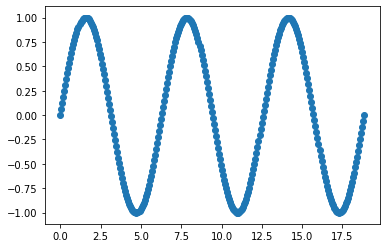

In [13]:
T = np.linspace(0, 3, 300)
N = len(T)
plt.scatter(T*2*np.pi, np.sin(T*2*np.pi))

In [14]:
def applySin(X, multi=1):
    return np.sin(X*multi*2*np.pi)

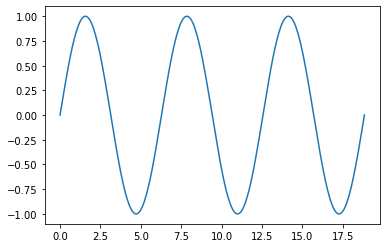

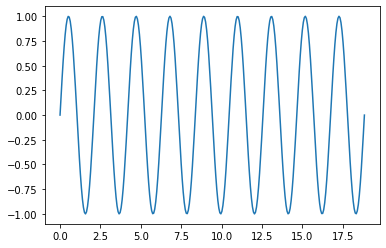

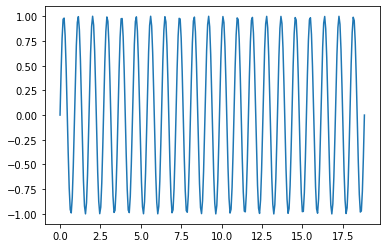

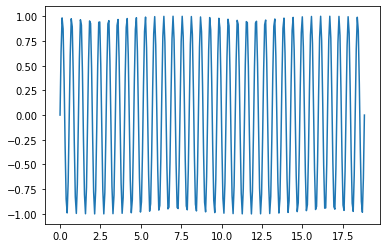

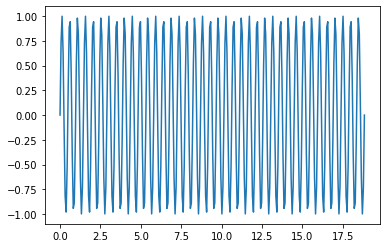

In [15]:
X1 = applySin(T, 1)
X2 = applySin(T, 3)
X3 = applySin(T, 7)
X4 = applySin(T, 11)
X5 = applySin(T, 13)
plt.plot(T*2*np.pi, X1)
plt.show()
plt.plot(T*2*np.pi, X2)
plt.show()
plt.plot(T*2*np.pi, X3)
plt.show()
plt.plot(T*2*np.pi, X4)
plt.show()
plt.plot(T*2*np.pi, X5)

a) Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

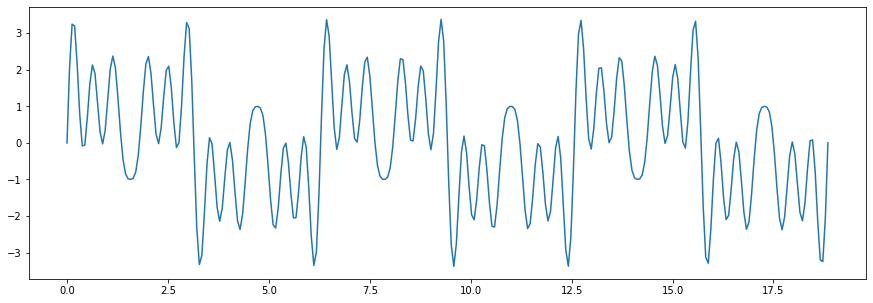

In [16]:
f1 = X1+X2+X3+X4+X5
plt.figure(figsize=(15,5))
plt.plot(T*np.pi*2, f1)

b) Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punktcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliowści

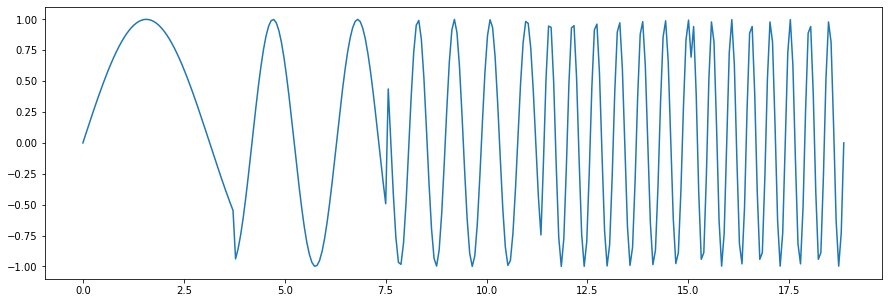

In [17]:
XS = [X1, X2, X3, X4, X5]
f2 = []
for ix, X in enumerate(XS):
    f2.append(X[ix*N//5:(ix+1)*N//5])
f2=np.ndarray.flatten(np.array(f2))
plt.figure(figsize=(15,5))
plt.plot(T*2*np.pi, f2)

- Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część urojoną wyniku transformacji

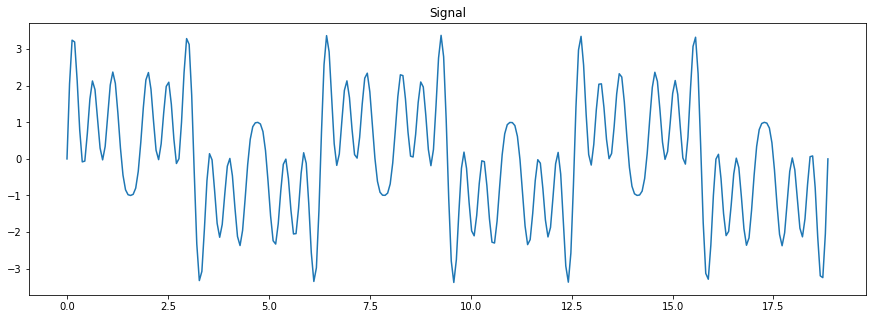

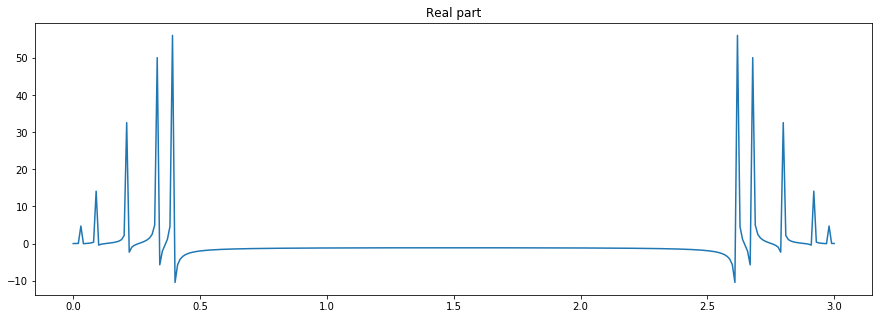

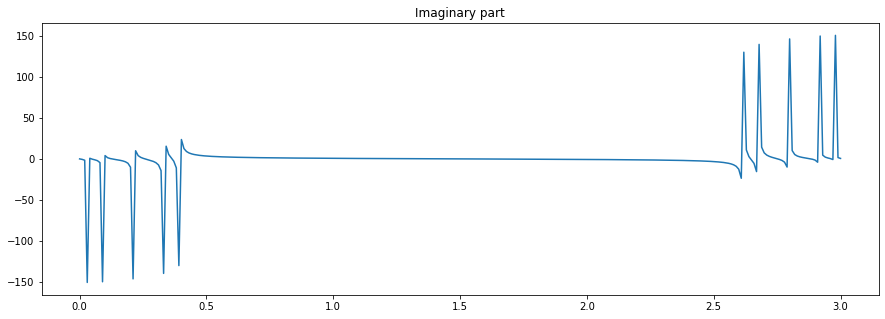

In [18]:
fft1 = fft(f1)
plt.figure(figsize=(15,5))
plt.title("Signal")
plt.plot(T*np.pi*2, f1)
plt.show()
plt.figure(figsize=(15,5))
plt.title("Real part")
plt.plot(T, np.real(fft1))
plt.show()
plt.figure(figsize=(15,5))
plt.title("Imaginary part")
plt.plot(T, np.imag(fft1));

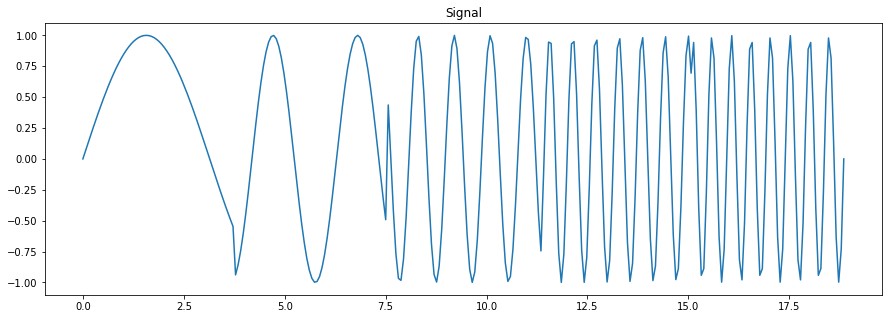

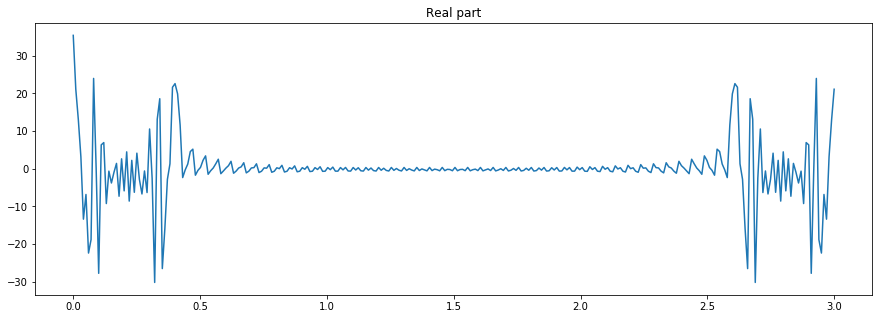

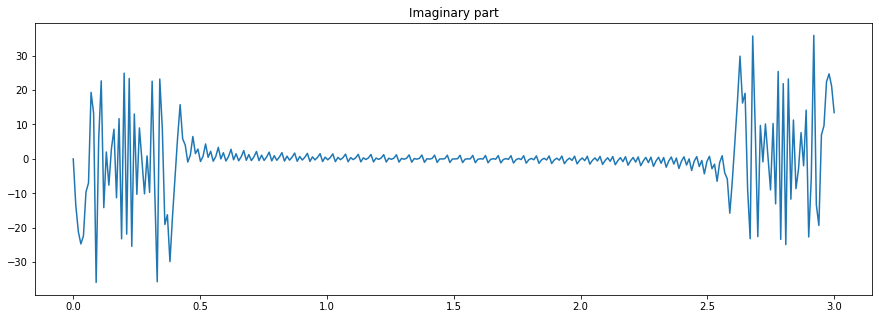

In [19]:
fft2 = fft(f2)
plt.figure(figsize=(15,5))
plt.title("Signal")
plt.plot(T*2*np.pi, f2)
plt.show()
plt.figure(figsize=(15,5))
plt.title("Real part")
plt.plot(T, np.real(fft2))
plt.show()
plt.figure(figsize=(15,5))
plt.title("Imaginary part")
plt.plot(T, np.imag(fft2));